<a href="https://colab.research.google.com/github/purpCactus/pythonia.init/blob/main/Session_10/RNN_GoogleStockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RNN - Google Stock price estimation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Dataset import
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:,1:2].values
whole_set = np.concatenate((training_set, test_set))

In [ ]:
# Scale data into 0-1 range
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
whole_set_scaled = sc.fit_transform(whole_set)

In [ ]:
# Train set splitting
x_train = []
x_test = []
y_train = []
y_test = []
for i in range(60, 1258):
  x_train.append(whole_set_scaled[i-60:i, 0:1])
  y_train.append(whole_set_scaled[i, 0:1])
for i in range(1318, 1338):
  x_test.append(whole_set_scaled[i-60:i, 0:1])
  y_test.append(whole_set_scaled[i, 0:1])


In [ ]:
# reforming to NP array
x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [ ]:
# Reshaping to 3D tensor
# it's not necessary, the arrays are in 3D already.
# x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Imporing libs
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
# Preparing the sequential model
model = Sequential()

In [ ]:
# LSTM first layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.20))
# LSTM second layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.20))
# LSTM third layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.20))
# LSTM forth layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.20))
# Dense ourput layer
model.add(Dense(units=1))

In [ ]:
# Compile
model.compile(optimizer='adam', loss='mean_squared_error')
# Fit
model.fit(x_train, y_train, epochs=100, batch_size=20, validation_data=(x_test, y_test))

Epoch 1/100
60/60 [==============================] - 26s 136ms/step - loss: 0.0610 - val_loss: 4.9586e-04
Epoch 2/100
60/60 [==============================] - 6s 102ms/step - loss: 0.0059 - val_loss: 0.0026
Epoch 3/100
60/60 [==============================] - 6s 102ms/step - loss: 0.0046 - val_loss: 5.9018e-04
Epoch 4/100
60/60 [==============================] - 6s 102ms/step - loss: 0.0054 - val_loss: 0.0091
Epoch 5/100
60/60 [==============================] - 6s 101ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 6/100
60/60 [==============================] - 6s 102ms/step - loss: 0.0052 - val_loss: 0.0015
Epoch 7/100
60/60 [==============================] - 6s 103ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 8/100
60/60 [==============================] - 6s 103ms/step - loss: 0.0030 - val_loss: 7.1731e-04
Epoch 9/100
60/60 [==============================] - 6s 102ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 10/100
60/60 [==============================] - 6s 102ms/step - loss: 0.

In [ ]:
# Making prediction for the test data
y_pred = model.predict(x_test)

In [ ]:
# Inverse the Scaling 
y_pred = sc.inverse_transform(y_pred)
y_test = sc.inverse_transform(y_test)

array([[784.7712 ],
       [781.98315],
       [784.5117 ],
       [786.3028 ],
       [790.24115],
       [797.08813],
       [801.3195 ],
       [801.1084 ],
       [800.8608 ],
       [801.2917 ],
       [801.8632 ],
       [801.9516 ],
       [801.8448 ],
       [802.6923 ],
       [803.626  ],
       [810.3065 ],
       [817.8691 ],
       [824.4937 ],
       [825.661  ],
       [816.776  ]], dtype=float32)

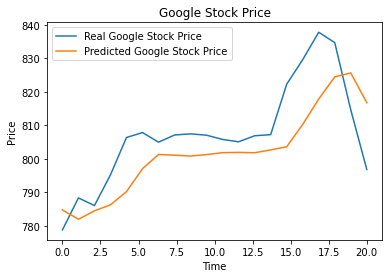

In [ ]:
# Visualizeing the data
xAxis = np.linspace(0, 20, 20)
plt.plot(xAxis, y_test, label='Real Google Stock Price')
plt.plot(xAxis, y_pred, label='Predicted Google Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()